In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

In [58]:
winedf = pd.read_csv(r"D:\Download\DataScience\Files\Week 180923\Miniproject\winequality_2.csv")

In [59]:
winedf

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red_wine
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0


In [60]:
#Starting data exploration phase with basic rows and columns
winedf.shape

(6497, 13)

In [61]:
#Checking basic statistic of the dataframe. Noticed chlorides and density column has 6496 count while shape tells us 6497.
#Could be missing value
winedf.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red_wine
count,6497.000000,6497.000000,6497.000000,6497.000000,6496.000000,6497.000000,6497.000000,6496.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.057589,30.525319,115.744574,0.994696,3.218501,0.531268,10.491801,5.818378,0.246114
std,1.296434,0.164636,0.145318,4.757804,0.131833,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,0.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,0.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,0.000000
max,15.900000,1.580000,1.660000,65.800000,10.300000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


In [62]:
#Checking dtypes as well just in case
winedf.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
red_wine                  int64
dtype: object

In [63]:
#Checking for unique values on each column. 
for column in winedf.columns:
    print(f"Column name: {column}")
    print(winedf[column].value_counts())
    print("\n")

Column name: fixed acidity
6.8     354
6.6     327
6.4     305
7.0     282
6.9     279
       ... 
14.0      1
14.3      1
13.8      1
13.5      1
3.9       1
Name: fixed acidity, Length: 106, dtype: int64


Column name: volatile acidity
0.280    286
0.240    266
0.260    256
0.250    238
0.220    235
        ... 
1.010      1
1.090      1
0.905      1
0.805      1
0.355      1
Name: volatile acidity, Length: 187, dtype: int64


Column name: citric acid
0.30    337
0.28    301
0.32    289
0.49    283
0.26    257
       ... 
0.88      1
1.66      1
0.99      1
1.23      1
0.86      1
Name: citric acid, Length: 89, dtype: int64


Column name: residual sugar
2.00     235
1.80     228
1.60     223
1.40     219
1.20     195
        ... 
5.95       1
7.45       1
65.80      1
14.05      1
18.40      1
Name: residual sugar, Length: 316, dtype: int64


Column name: chlorides
0.044    206
0.036    200
0.042    187
0.046    185
0.050    182
        ... 
0.422      1
0.222      1
0.143      1
0.2

In [64]:
#Checking null value and seems that chlorides and density indeed have a missing value
winedf.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               1
free sulfur dioxide     0
total sulfur dioxide    0
density                 1
pH                      0
sulphates               0
alcohol                 0
quality                 0
red_wine                0
dtype: int64

In [65]:
#I think given that it's only 1 missing value out of 6497 rows, it should be reasonable to replace it with the mean
winedf = winedf.fillna(winedf.mean())

In [66]:
#Checking for nulls again to make sure
winedf.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
red_wine                0
dtype: int64

In [67]:
#Checking for correlation
winedf.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red_wine
fixed acidity,1.000000,0.219008,0.324436,-0.111981,0.084461,-0.282735,-0.329054,0.458905,-0.252700,0.299568,-0.095452,-0.076743,0.486740
volatile acidity,0.219008,1.000000,-0.377981,-0.196011,0.115973,-0.352557,-0.414476,0.271269,0.261454,0.225984,-0.037640,-0.265699,0.653036
citric acid,0.324436,-0.377981,1.000000,0.142451,-0.000083,0.133126,0.195242,0.096175,-0.329808,0.056197,-0.010493,0.085532,-0.187397
residual sugar,-0.111981,-0.196011,0.142451,1.000000,-0.042611,0.402871,0.495482,0.552694,-0.267320,-0.185927,-0.359415,-0.036980,-0.348821
chlorides,0.084461,0.115973,-0.000083,-0.042611,1.000000,-0.062425,-0.076659,0.102159,0.020197,0.105483,-0.078060,-0.064390,0.156906
free sulfur dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.062425,1.000000,0.720934,0.025796,-0.145854,-0.188457,-0.179838,0.055463,-0.471644
total sulfur dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.076659,0.720934,1.000000,0.032540,-0.238413,-0.275727,-0.265740,-0.041385,-0.700357
density,0.458905,0.271269,0.096175,0.552694,0.102159,0.025796,0.032540,1.000000,0.011350,0.259362,-0.686698,-0.305721,0.390372
pH,-0.252700,0.261454,-0.329808,-0.267320,0.020197,-0.145854,-0.238413,0.011350,1.000000,0.192123,0.121248,0.019506,0.329129
sulphates,0.299568,0.225984,0.056197,-0.185927,0.105483,-0.188457,-0.275727,0.259362,0.192123,1.000000,-0.003029,0.038485,0.487218


In [68]:
#Listing columns which are correlated the most to least
#The top 5 seems to be:
# - total sulfur dioxide & free sulfur dioxide
# - volatile acidity & red wine
# - density & residual sugar
# - total sulfur dioxide & residual sugar

correlation_list = winedf.corr().unstack().sort_values(ascending=False)
for column, value in correlation_list.items():
    if value >= 1: continue 
    print(column, value)

('total sulfur dioxide', 'free sulfur dioxide') 0.720934081378524
('free sulfur dioxide', 'total sulfur dioxide') 0.720934081378524
('volatile acidity', 'red_wine') 0.6530355891787265
('red_wine', 'volatile acidity') 0.6530355891787265
('density', 'residual sugar') 0.5526938641176805
('residual sugar', 'density') 0.5526938641176805
('total sulfur dioxide', 'residual sugar') 0.495481587006647
('residual sugar', 'total sulfur dioxide') 0.495481587006647
('red_wine', 'sulphates') 0.4872179700573127
('sulphates', 'red_wine') 0.4872179700573127
('red_wine', 'fixed acidity') 0.486739832068047
('fixed acidity', 'red_wine') 0.486739832068047
('fixed acidity', 'density') 0.4589048293155365
('density', 'fixed acidity') 0.4589048293155365
('alcohol', 'quality') 0.44431852000751915
('quality', 'alcohol') 0.44431852000751915
('free sulfur dioxide', 'residual sugar') 0.4028706400566597
('residual sugar', 'free sulfur dioxide') 0.4028706400566597
('density', 'red_wine') 0.39037154336061514
('red_wine

## Visualization
I'm now doing a correlation study again but now with sns.heatmap and sns.pairplot which will also mark the beginning of Visualization phase

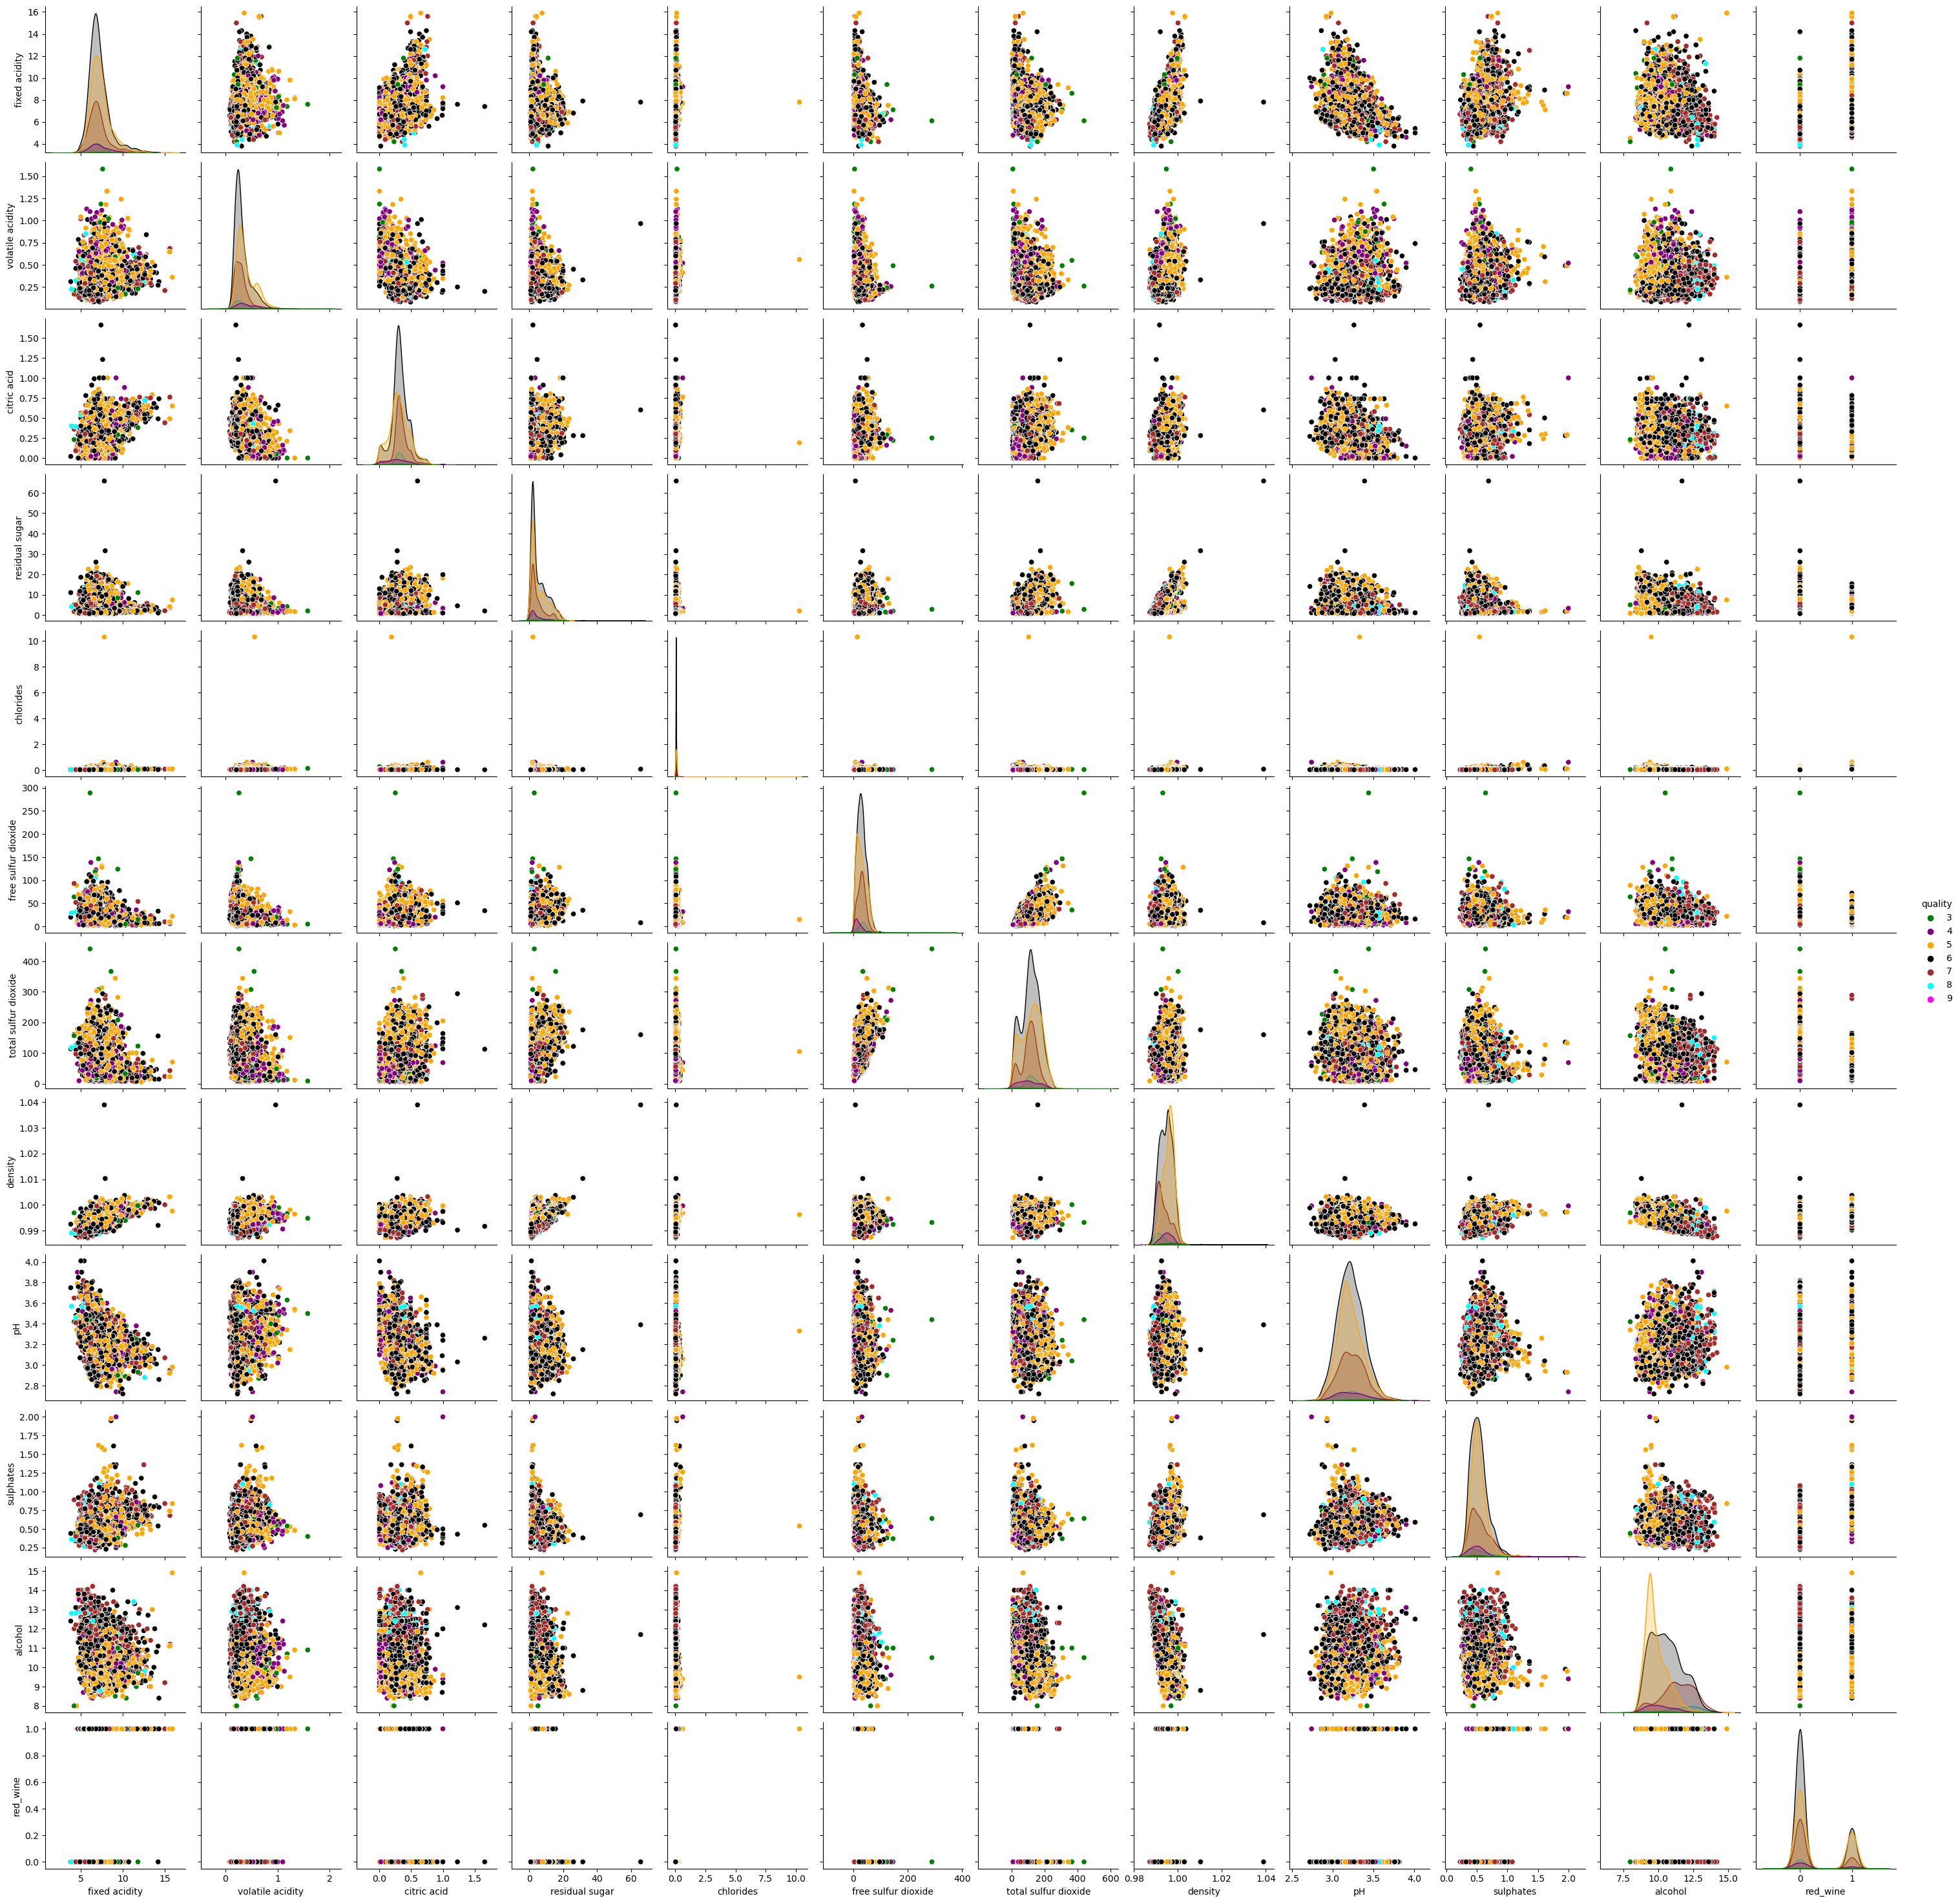

In [11]:
custom_palette = {1: "red", 2: "blue", 3: "green", 4: "purple", 5: "orange", 6: "black", 7: "brown", 8: "cyan", 9: "magenta"}
sns.pairplot(winedf, hue='quality', palette=custom_palette)

<Axes: >

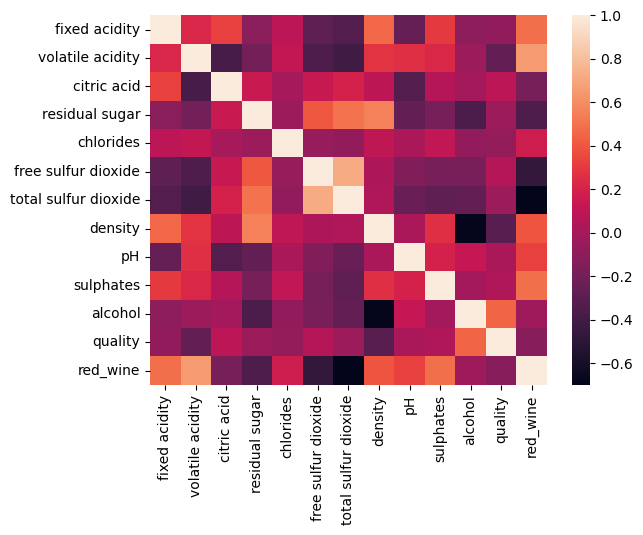

In [69]:
sns.heatmap(winedf.corr())

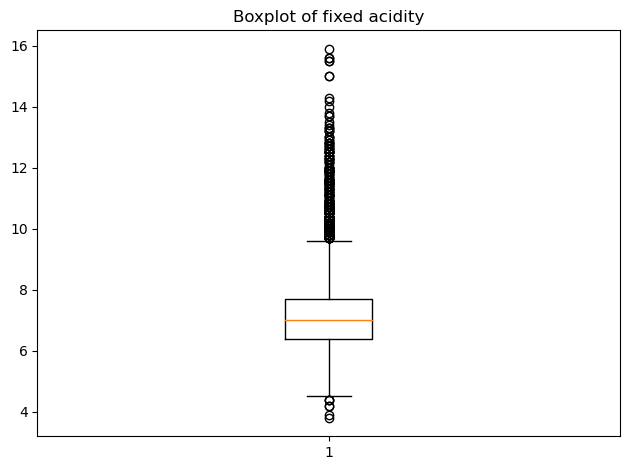

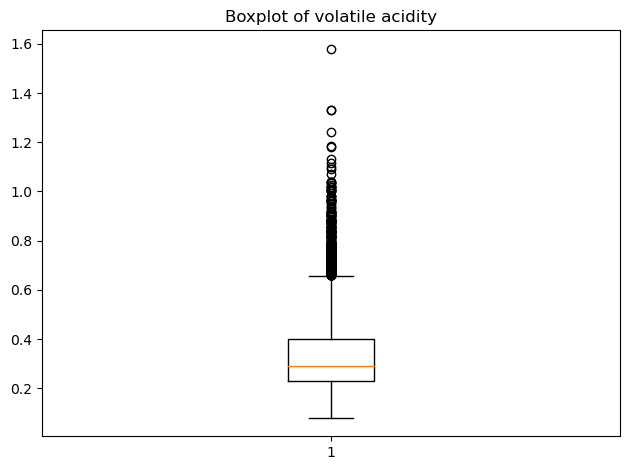

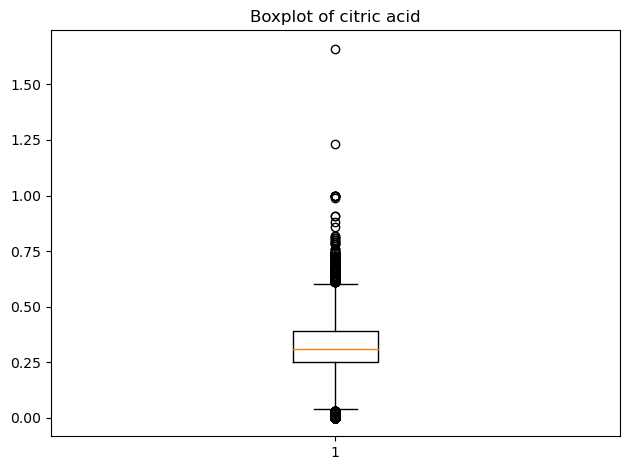

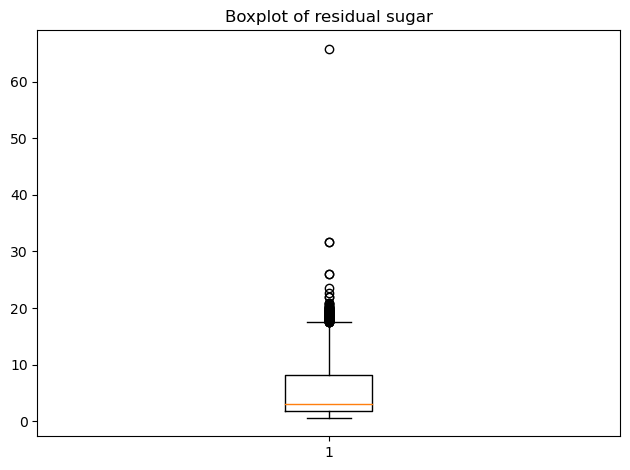

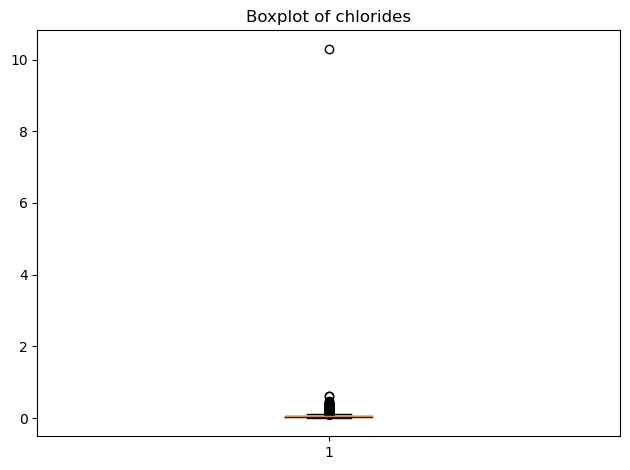

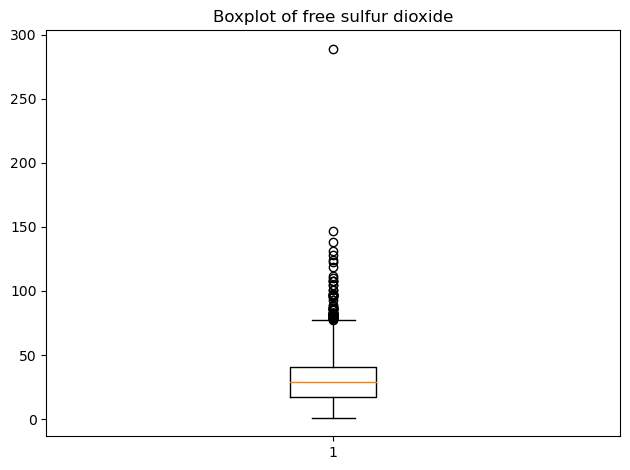

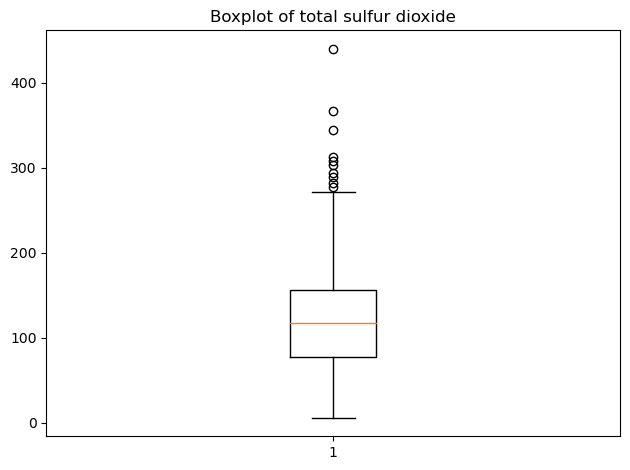

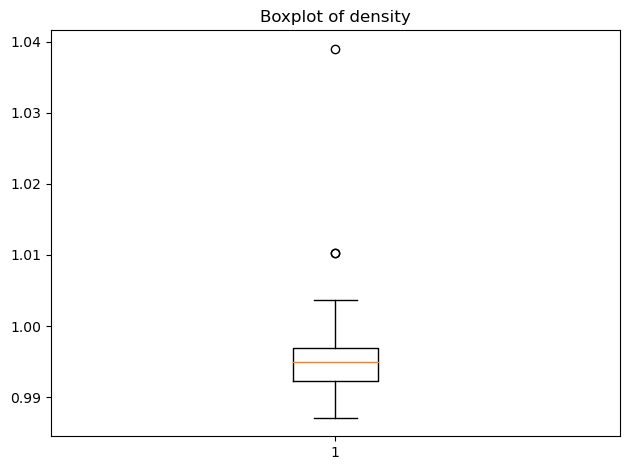

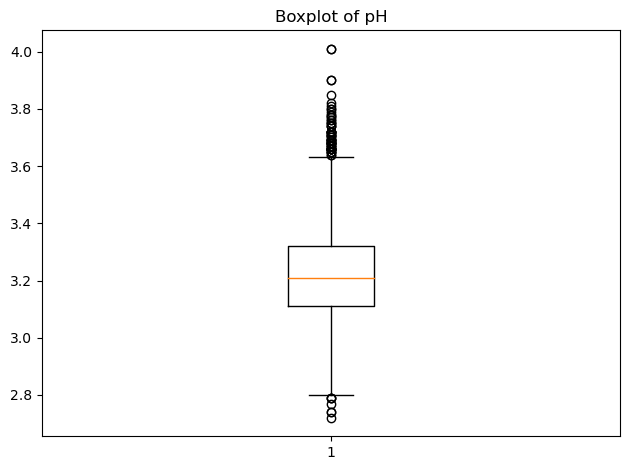

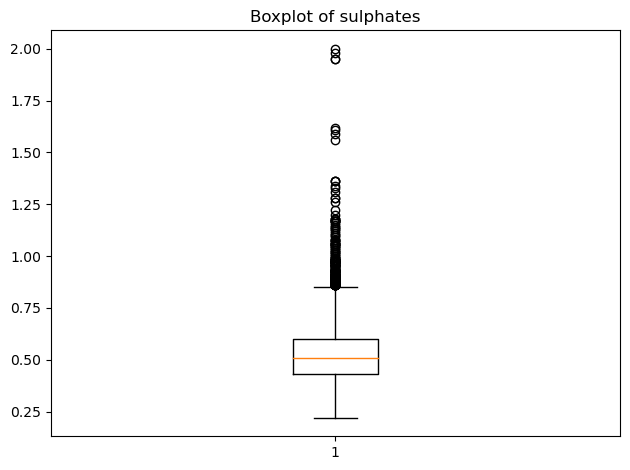

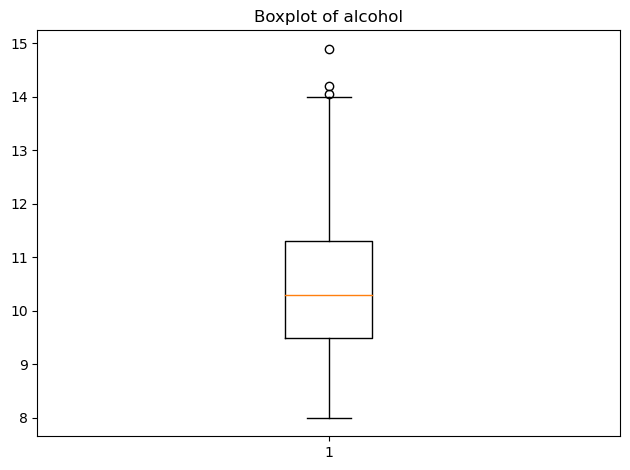

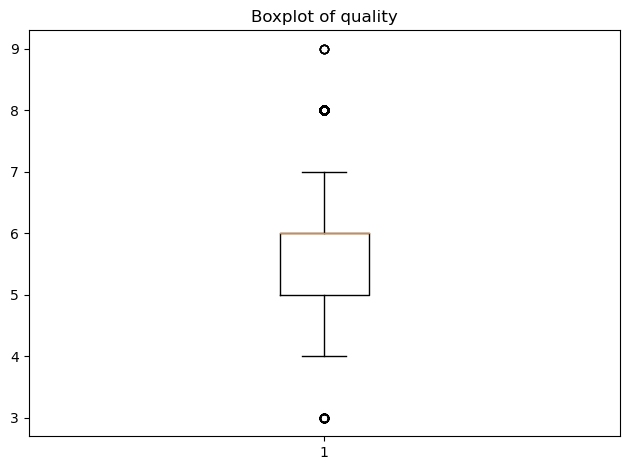

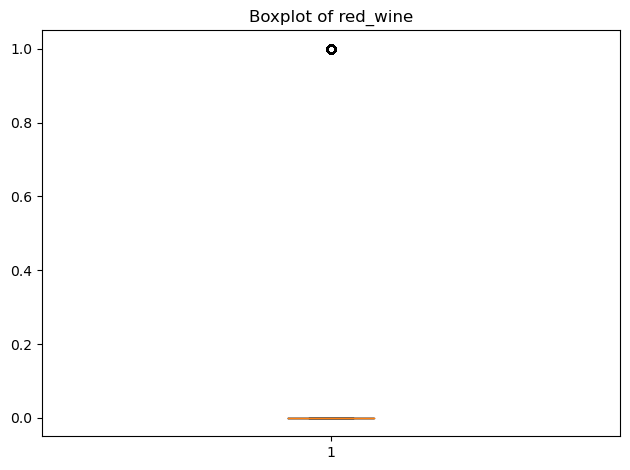

In [70]:
#Doing boxplot as well to check outliers for each column

for column in winedf.columns:
    plt.boxplot(winedf[column])
    plt.title(f'Boxplot of {column}')
    plt.tight_layout()
    plt.show()
    

Text(0, 0.5, 'Frequency')

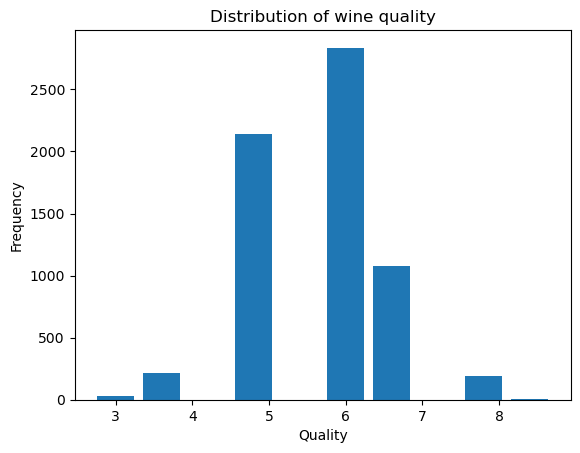

In [71]:
#I think the quality column would probably be the most important feature, so I'm making histogram for it
plt.hist(winedf['quality'], bins=10, align='left', rwidth=0.8);
plt.title('Distribution of wine quality')
plt.xlabel('Quality')
plt.ylabel('Frequency')

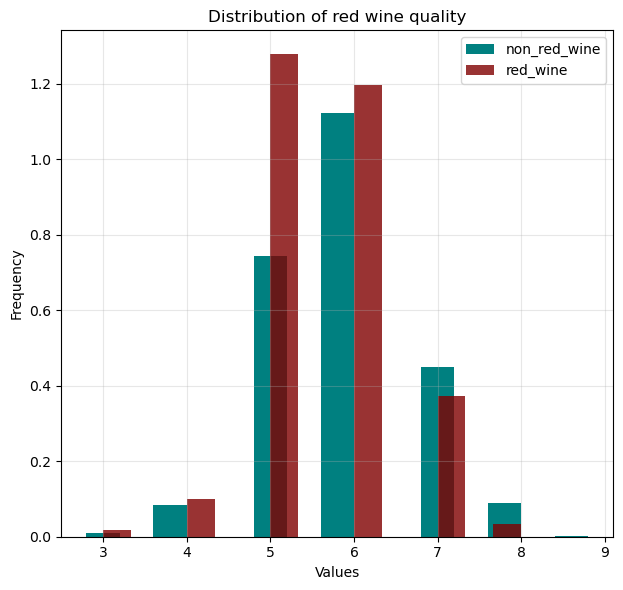

In [72]:
#I was also curious on what is the distribution for red wine vs non-red wine
red_wine = winedf[winedf['red_wine'] == 1]
non_red_wine = winedf[winedf['red_wine'] == 0]

plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.grid(True, zorder=2, alpha=0.3)

plt.hist(non_red_wine['quality'], bins=15, align='left', color='teal', alpha=1.00, label='non_red_wine', density=True);
plt.title('Distribution of non-red-wine quality')
plt.xlabel('Quality')
plt.ylabel('Frequency')


plt.hist(red_wine['quality'], bins=15, color='maroon', alpha=0.8, label='red_wine', density=True)
plt.title('Distribution of red wine quality')
plt.xlabel('Values')
plt.ylabel('Frequency')


plt.tight_layout()
plt.legend();


In [73]:
red_wine['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [74]:
non_red_wine['quality'].value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

## Hypothesis testing
There seems to be more red wine falling in the bins of quality value 6 and below compared to non-red wine.

At the same time there seems to be comparatively more non-red wine with quality value 7 or greater. Maybe then, a hypothesis testing could be done as such:
- Null Hypothesis (H0): The average quality of red wine for the dataset is equal to or higher than the average quality of non-red wine.

- Alternative Hypothesis (H1): The average quality of red wine for the dataset is lower compared to average quality of non-red wine. 

After some looking around, I believe a one-tailed, paired sample Z-test would be appropriate for this hypothesis testing. I picked a Z-test because the sample is large enough to allow for it (in this case, it's definitely n > 30). The second condition required for z-test seem to also be satisfied in that we know the population's variance. (Since what we want to test isn't related to ALL red-wine and non red-wine, but rather just the ones in the dataset. Which would make the whole dataset the population in a sense)

Also, since there seems to be much more non-red wine than red wine datapoints (4898 vs 1599 to be exact). For the purpose of this hypothesis testing, a random sample of 1000 will be taken from each pool and the Z-test will be performed to it instead of the whole datapoints.

In [75]:
#Setting significance level (alpha)
alpha = 0.05

#Selecting random sample for testing
red_wine_sample = red_wine['quality'].sample(1000)
non_red_wine_sample = non_red_wine['quality'].sample(1000)

#Calculating sample means and sample standard deviation for both group
mean_red = red_wine_sample.mean()
mean_non_red = non_red_wine_sample.mean()
s_red = red_wine_sample.std()
s_non_red = non_red_wine_sample.std()

In [76]:
#Calculating standard error of the difference in means
SE_diff = np.sqrt((s_red**2 / len(red_wine_sample)) + (s_non_red**2 / len(non_red_wine_sample)))
SE_diff

0.037363645995031745

In [77]:
#Calculating the z-score
Z = (mean_red - mean_non_red) / SE_diff
Z

-6.36982804171861

In [78]:
#Finding critical value at chosen alpha level
p_value = 1 - norm.cdf(Z)

if p_value < alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

print("Calculated p-value:", p_value)

Fail to reject the null hypothesis
Calculated p-value: 0.9999999999053799


# Hypothesis test conclusion

The result in the z-test is saying we failed to reject the null hypothesis and p-value is very large at 0.9999999999977789, meaning there's no real difference between average quality of red wine and non red-wine

# Feature Engineering & Analysis

I was also curious if there is a way to practice feature engineering to maybe get some narrative going beyond the basic data exploration. One thing that was interesting to me when doing the heatmap was: out of all the columns, alchohol seems to correspond the highest with the quality column. Other column have some high correlation as well, but if we were to do a predictive analysis for this for real world scenario, I imagine the quality column would be one that would be paid the most attention to.

In [79]:
#First do a groupby to the alchohol column and classify it to low, medium and high
#For that we'll do a pd.cut() but first we need to define the binning for the cut
print(winedf['alcohol'].min(), winedf['alcohol'].max())

8.0 14.9


In [80]:
#Now that we know the range, we can split it into 3 groups. It is a bit arbitrary but here's how I did it
bins = [8, 10, 12, 14.9]
labels = ['Low', 'Medium', 'High']

alcohol_level = pd.cut(winedf['alcohol'], bins=bins, labels=labels, right=False)
winedf.insert(winedf.columns.get_loc('alcohol') + 1, 'alcohol_level', alcohol_level)

In [81]:
winedf

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,alcohol_level,quality,red_wine
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,Low,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,Low,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,Low,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,Low,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,Low,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,Medium,6,0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,Low,5,0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,Low,6,0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,High,7,0


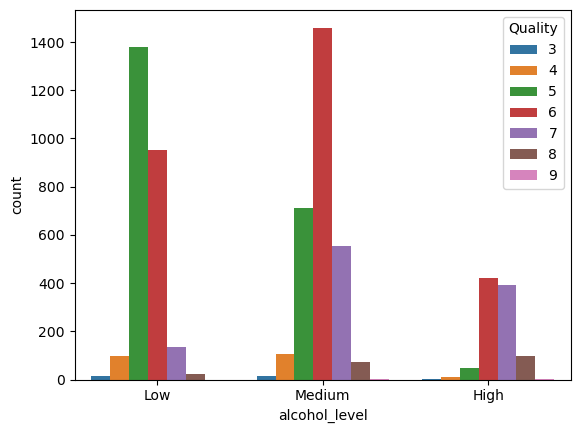

In [89]:
#Looking at scatter plot for each acohol level and how it corresponds to quality
sns.countplot(data=winedf, x='alcohol_level', hue='quality')
plt.legend(title='Quality', loc='upper right', labels=[3, 4, 5, 6, 7, 8, 9])  # Specify quality levels
plt.show()


In here we can visually see by the color that the quality does get significantly better as the achohol level increases